In [1]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path("..").resolve()
sys.path.append(str(project_root))

import numpy as np
import matplotlib.pyplot as plt
from experiments.datasets import make_squares
from experiments.datasets import plot_data
from src.models.mlp1 import Mlp1

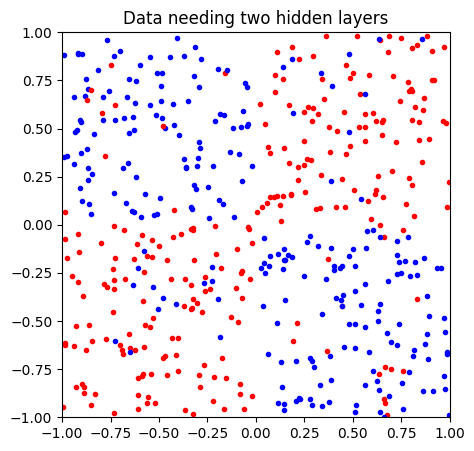

In [ ]:
X_states, y_labels = make_squares(p=500, noise_rate=0.1)

plot_title = "Square data with noise"
plot_data(X_states, y_labels, plot_title)

In [8]:
model = Mlp1(input_dim=2, hidden_dim=4, lr=0.01)

outputs, _ = model.forward(X_states)  # _ is cache, not needed here
w, b = model.W2, model.b2

loss = 0.5 * ((y_labels - outputs)**2).mean()
predictions = model.predict(X_states)
accuracy = (predictions == y_labels).mean()

print(f"Loss before training: {loss:.4f} – Accuracy before training: {accuracy:.2f}")

Loss before training: 0.6151 – Accuracy before training: 0.52


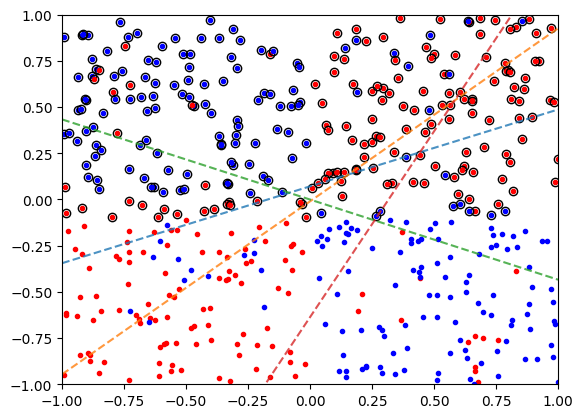

In [9]:
# Plot, let red be in the set
for mu in range(len(y_labels)):
    if y_labels[mu] == 1 :
        plt.plot(X_states[mu,0], X_states[mu,1],'r.')
    else :
        plt.plot(X_states[mu,0], X_states[mu,1],'b.')
    # plot classification of network as circles
    if predictions[mu] == 1 :
        plt.plot(X_states[mu,0], X_states[mu,1],'ko',mfc='none')

# Plot decision boundaries of hidden neurons
x1_span = np.linspace(-1, 1, 100)
colors = plt.cm.tab10.colors  # distinct colors

for j in range(model.W1.shape[0]):
    w = model.W1[j]
    b = model.b1[j]
    color = colors[j % len(colors)]

    if abs(w[1]) < 1e-6:
        # vertical line: w0 * x - b = 0  ->  x = b / w0
        x = b / w[0]
        plt.axvline(x, linestyle="--", color=color, alpha=0.8)
    else:
        x2_span = (-w[0] * x1_span + b) / w[1]
        plt.plot(x1_span, x2_span, "--", color=color, alpha=0.8)

plt.axis([-1, 1, -1, 1])
plt.show()

In [10]:
model.fit(X_states, y_labels, 200)

Out = model.predict(X_states)

Epoch 1/200 – Loss: 0.4578 – Accuracy: 0.61
Epoch 2/200 – Loss: 0.3977 – Accuracy: 0.71
Epoch 3/200 – Loss: 0.3498 – Accuracy: 0.78
Epoch 4/200 – Loss: 0.3197 – Accuracy: 0.81
Epoch 5/200 – Loss: 0.3012 – Accuracy: 0.82
Epoch 6/200 – Loss: 0.2891 – Accuracy: 0.83
Epoch 7/200 – Loss: 0.2806 – Accuracy: 0.84
Epoch 8/200 – Loss: 0.2744 – Accuracy: 0.84
Epoch 9/200 – Loss: 0.2695 – Accuracy: 0.84
Epoch 10/200 – Loss: 0.2656 – Accuracy: 0.85
Epoch 11/200 – Loss: 0.2624 – Accuracy: 0.86
Epoch 12/200 – Loss: 0.2597 – Accuracy: 0.86
Epoch 13/200 – Loss: 0.2574 – Accuracy: 0.87
Epoch 14/200 – Loss: 0.2554 – Accuracy: 0.87
Epoch 15/200 – Loss: 0.2537 – Accuracy: 0.87
Epoch 16/200 – Loss: 0.2521 – Accuracy: 0.87
Epoch 17/200 – Loss: 0.2508 – Accuracy: 0.88
Epoch 18/200 – Loss: 0.2495 – Accuracy: 0.88
Epoch 19/200 – Loss: 0.2483 – Accuracy: 0.88
Epoch 20/200 – Loss: 0.2473 – Accuracy: 0.88
Epoch 21/200 – Loss: 0.2463 – Accuracy: 0.88
Epoch 22/200 – Loss: 0.2454 – Accuracy: 0.88
Epoch 23/200 – Loss

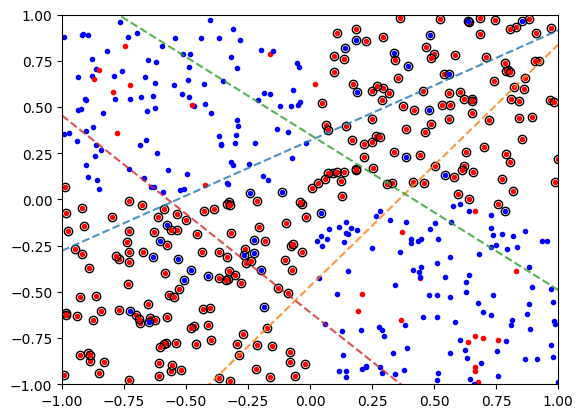

In [11]:
# Plot, let red be in the set
for mu in range(len(y_labels)):
    if y_labels[mu] == 1 :
        plt.plot(X_states[mu,0], X_states[mu,1],'r.')
    else :
        plt.plot(X_states[mu,0], X_states[mu,1],'b.')
    # plot classification of network as circles
    if Out[mu] == 1 :
        plt.plot(X_states[mu,0], X_states[mu,1],'ko',mfc='none')

# Plot decision boundaries of hidden neurons
x1_span = np.linspace(-1, 1, 100)
colors = plt.cm.tab10.colors  # distinct colors

for j in range(model.W1.shape[0]):
    w = model.W1[j]
    b = model.b1[j]
    color = colors[j % len(colors)]

    if abs(w[1]) < 1e-6:
        # vertical line: w0 * x - b = 0  ->  x = b / w0
        x = b / w[0]
        plt.axvline(x, linestyle="--", color=color, alpha=0.8)
    else:
        x2_span = (-w[0] * x1_span + b) / w[1]
        plt.plot(x1_span, x2_span, "--", color=color, alpha=0.8)

plt.axis([-1, 1, -1, 1])
plt.show()